##**Central Limit Theorem**

Suppose that $x_1$, $x_2,$ . . . $x_n$ are independent random variables drawn from a distribution with mean $\mu$ and standard deviation $\sigma$. The sample mean is $\bar{x} = \frac{x_1+x_2+\ldots+x_n}{n}$.

<br>

The central limit theorem states that as $n \rightarrow \infty$, the sample mean random variable $\bar{x}$ converges in distribution to $\mathcal{N}(\mu, \frac{\sigma}{\sqrt{n}})$, which is the normal distribution with mean $\mu$ and standard deviation $\frac{\sigma}{\sqrt{n}}$.

<br>

The standard deviation of the sample mean distribution, $\frac{\sigma}{\sqrt{n}}$, is called the *standard error*, but you can simply think of it as the standard deviation of the sample mean. Thinking of it as the standard deviation of the sample mean will come in handy later!

<br>

If we choose to think of the standard error as the standard deviation of the sample mean, we can redefine the central limit theorem using z scores. Let $z_n = \frac{\bar{x} - \mu}{\sigma/\sqrt{n}}$, which is of course the z score of the sample mean $\bar{x}$. Then by central limit theorem, we know that as $n \rightarrow \infty$, the random variable $z_n$ converges to the standard normal distribution $\mathcal{N}(0, 1)$.

<br>

**What does the central limit theorem mean for data scientists?**

Ignoring the technical math, the central limit theorem simply implies that when we calculate the sample mean of a variable in our data as long as $n$ is reasonably large, we can safely assume that the sample mean is normally distributed with mean $\mu$ and standard deviation $\sigma / \sqrt{n}$, where $n$ is the number of observations in the data. It turns out that is very useful!

<br>

**Key Takeaway:** When I calculate a sample mean $\bar{x}$, I can reasonably assume that it is normally distributed with mean $\bar{x}$ and standard deviation given by the standard error $\frac{\sigma}{\sqrt{n}}$.

<br>

**Side note**: Some rigorous mathematicians may argue a little bit with that key takeaway because the mean should really be assumed to be $\mu$ not $\bar{x}$. However, in data science we usually don't know the true mean $\mu$, but we do know that $\bar{x}$ converges to $\mu$ as $n \rightarrow \infty$ by the law of large numbers, so your instructor Will Melville would say in data science it's usually fine to assume that the normal distribution described in the key takeaway has mean $\bar{x}$.

<br>


**Important note on standard error**: the standard error is simply the standard deviation of the sample mean, but a potentially more useful and intuitive way to think of it is it measures the confidence/uncertainty we have that the sample mean represents the true underlying population mean. The larger the standard error, the less confident/more uncertain we are about our sample means. The smaller the standard error, the more confident/less uncertain we are about our sample means.

##**CLT Practice**

In the following cells, I provide a function that takes as input a probability distribution (from scipy.stats) and a sample size $n$. The function then draws $n$ samples from the inputted probability distribution a large number of times to approximate the distribution of sample means. It plots a histogram of the sample means. Suppose that the inputted probability distribution has mean $\mu$ and standard deviation $\sigma$. The function also plots the normal distribution with mean $\mu$ and standard deviation given by the standard error $\sigma / \sqrt{n}$.

<br>

Play around with this function! Here are some questions you may want to answer:

*   Does the shape of the distribution of sample means depend on the inputted distribution?

*   How does changing $n$ change the shape of the sample mean distribution? (Think about this before you test it out. If standard error represents confidence in the mean, does increasing $n$ increase or decrease our confidence in the sample mean? How should that manifest itself in the distribution of sample means?)

* How does sampling from a distribution with mean $\mu_1$ versus $\mu_2$ change the sample mean distribution?

* How does sampling from a distribution with standard deviation $sigma_1$ versus $\sigma_2$ change the sample mean distribution?

* How does sampling from two different distributions with the same means and standard deviations change the sample mean distribution?




In [ ]:
import numpy as np
from matplotlib import pyplot as plt

#for probability distributions, look up the docs on scipy.stats! Here I import a normal distribution, a gamma, a beta, a poisson, and a binomial, but there are many others!
from scipy.stats import norm, gamma, beta, poisson, binom

In [ ]:
#the central limit theorem function!

def central_limit_theorem(dist, n, num_sample_means = 10000, hist_bins = 25):
  """
  dist is one of the scipy.stats probability distributions with appropriate parameters defined.
  For example, you could input dist = norm(loc = 0, scale = 1) for the standard normal, or you could input
  binom(n = 1, p = 0.5) for the binomial distribution with one trial (one coin flip) where probability of success (heads)
  is 0.5.

  n is the number of samples used to calculate the sample mean. Remember by the central limit theorem, as n goes to infinity,
  we converge to a normal distribution!

  num_sample_means is an optional input that says how many sample means to calculate before plotting the histogram. You probably want to
  keep this number large. Default value is 10,000

  hist_bins is anoter optional input that allows you to set the number of histogram bins to help make the plot look good
  """

  #get the true mean and standard deviation
  mu = dist.mean()
  sigma = dist.std()

  #sample the sample means
  sample_means = np.mean(dist.rvs(size = int(n*num_sample_means)).reshape((num_sample_means, n)), axis = 1)
  assert len(sample_means) == num_sample_means

  #plot
  plt.hist(sample_means, density = True, bins = hist_bins, alpha = 0.8, label = 'Samples')
  x = np.linspace(np.min(sample_means), np.max(sample_means), 100)
  plt.plot(x, norm(loc = mu, scale = sigma / np.sqrt(n)).pdf(x), 'b--', label = 'Theoretical Distribution')
  plt.legend()
  plt.title('Distribution of Sample Means')
  plt.show()


## **CLT and z tests**

The goal of a t test is to test the null hypethesis that the sample mean is equal to some other known mean $\mu$. The central limit theorem can help us here! We know from the central limit theorem that if our samples are supposed to have been drawn from a distribution with mean $\mu$, then the sample mean $\bar{x}$ is normally distributed with mean $\mu$ and standard deviation given by the standard error $\sigma / \sqrt{n}$. We also know that if we calculate a z score for teh sample mean, it is standard normally distributed. Thus, in a z-test we first calculate a z score for the sample mean as $z = \frac{\bar{x} - \mu}{\sigma / \sqrt{n}}$. Then we see calculate the density of values that are as extreme or more extreme than $z$ in the standard normal distribution. We can do this in scipy using

`1 - norm.cdf(z)` if $z > 0$ or


`norm.cdf(z)` if $z \leq 0$.

What that code does is it calculates the areas under the normal density cuve highlighted in red in the following figures. If $z \leq 0$ it calculates the error highlighted in red on the left side of the curve, and if $z > 0$ it calculates the area highlighted in red on the right side of the curve. In simple, more intuitive terms, it calculates the p value of observing a sample mean as extreme or more extreme than $\bar{x}$ under the assumption of the null hypothesis that the true mean is $\mu$.

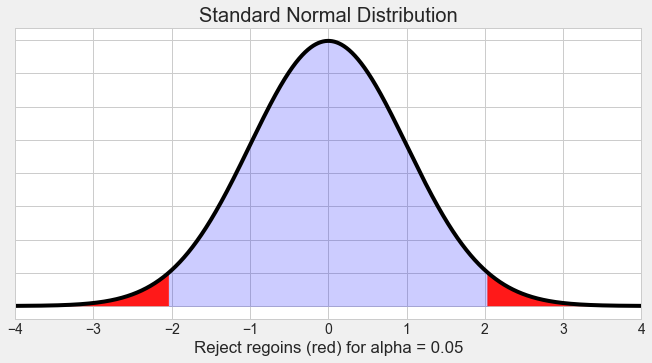



**Practice z-test 1**

In class:

Two volunteers. One choose the true mean. The other choose the data generation mean, standard deviation, prob dist, and sample size. Then we run a z test to see if the generated data has the same mean as the true mean.

In [ ]:
#code here!

**Baseball z test!**

weighted on base average (wOBA) is one of Will Melville's favorite statistics to evaluate a hitter in baseball. If you don't know what wOBA is that's okay. All you need to know is that like batting average, higher values of wOBA mean better hitters. The average wOBA on all regular season plate appearances in 2023 was 0.318 and the standard deviation was 0.513. Thus, we have $\mu = 0.318$ and $\sigma = 0.513$.

<br>

Aaron Judge of the New York Yankees is off to an amazing start to the 2025 season. In 191 plate appearances, he has a wOBA of 0.521! Perform a z test to see if Aaron Judge's 2025 wOBA is statistically significantly better than average.

In [ ]:
#mu and sigma
mu = 0.318
sigma = 0.513

#Aaron Judge's wOBA
xbar = 0.521

#number of PAs
n = 191

#calculate the z score and define the p value . . .



**CLT and z scores and uncertainty/CI**

Since the standard error is the standard deviation of the sample mean's normal distribution, we can easily calculate confidence intervals for our sample mean using the normal pdf!

Let's use the Aaron Judge example again. The standard deviation is 0.513, n is 191, and the sample mean is 0.521. Calculate a 95% confidence interval for Aaron Judge's true wOBA. Remember the 68-95-99.7 rule!

In [ ]:
#calculate the standard error, which is the standard deviation of the sample mean
std_err = 0.513 / np.sqrt(191).item()

ci95 = [0.521 - 2 * std_err, 0.521 + 2*std_err]

ci95

What if we want a confidence interval different from 95%? We can use the standard normal distribution to figure out which

In [ ]:
#what if we wanted a different confidence interval? Use the ppf function, which is the inverse of the cdf function.
#it gives the value such that x% of the density is left of that value, so if we want a confidence interval of
#size c, we define the number of standard deviations as ppf(0.5 + confidence_level / 2). If that value is y then the new confidence interval
#is mean - y*std_err, mean + y*std_err

confidence_level = 0.5
num_sd = norm(0, 1).ppf(0.5 + confidence_level / 2).item()
ci = [0.521 - (std_err * num_sd), 0.521 + (std_err * num_sd)]
ci